In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import MinMaxScaler, label_binarize
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.tree import DecisionTreeClassifier

from ppg_data import load_ppg_raw_data
from ppg_features import ppg_features, get_peaks

In [2]:
train_labels, train_data = load_ppg_raw_data("data/train8_reformat.xlsx")
test_labels, test_data = load_ppg_raw_data("data/test8_reformat.xlsx")

fs = 50 # Sampling frequency
train_features = [ppg_features(data, fs=fs) for data in train_data]
test_features = [ppg_features(data, fs=fs) for data in test_data]

In [9]:
feature_names = list(train_features[0].keys())
X_train = np.array([[f[n] for n in feature_names] for f in train_features])
X_test = np.array([[f[n] for n in feature_names] for f in test_features])

y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [5]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [ ]:
# Plot all features relationship with each other
# NB: Generate a lot of plots
# feature_keys = list(train_features[0].keys())
# n_features = len(feature_keys)
# n_labels = len(set(y_train))
# colors = plt.colormaps.get_cmap("gist_ncar")(np.linspace(0, 1, n_labels))

# for i in range(n_features):
#     for j in range(i + 1, n_features):
#         plt.figure(figsize=(16, 9))
#         for label in range(n_labels):
#             plt.scatter(X_train[y_train == label, i], X_train[y_train == label, j], color=colors[label], label=label)
#         plt.xlabel(feature_keys[i])
#         plt.ylabel(feature_keys[j])
#         plt.title(f"{feature_keys[i]} vs {feature_keys[j]}")
#         plt.grid()        
#         plt.show()
        

In [4]:
1# Split PPG samples into segments based on peak detection
def segment_ppg(data, peaks):
    segments = []
    for i in range(len(peaks) - 1):
        segments.append(data[peaks[i]:peaks[i + 1]])
    return segments

train_segments = []
train_segment_labels = []
test_segments = []
test_segment_labels = []

for i in range(len(train_data)):
    peaks = get_peaks(train_data[i], fs=fs)
    segments = segment_ppg(train_data[i], peaks)
    train_segments.extend(segments)
    train_segment_labels.extend([train_labels[i]] * len(segments))

for i in range(len(test_data)):
    peaks = get_peaks(test_data[i], fs=fs)
    segments = segment_ppg(test_data[i], peaks)
    test_segments.extend(segments)
    test_segment_labels.extend([test_labels[i]] * len(segments))

# Can take a while to run
train_segment_features = [ppg_features(data, fs=fs) for data in train_segments]
test_segment_features = [ppg_features(data, fs=fs) for data in test_segments]

f:\Laval\GIF-4101_Intro_apprentissage_auto\Project\repo\projet-ml\.venv\Lib\site-packages\scipy\signal\_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 33, using nperseg = 33
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
f:\Laval\GIF-4101_Intro_apprentissage_auto\Project\repo\projet-ml\.venv\Lib\site-packages\scipy\signal\_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 32, using nperseg = 32
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
f:\Laval\GIF-4101_Intro_apprentissage_auto\Project\repo\projet-ml\.venv\Lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
f:\Laval\GIF-4101_Intro_apprentissage_auto\Project\repo\projet-ml\.venv\Lib\site-packages\numpy\_core\_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
f:\Laval\GIF-4101_

In [5]:
# Scale the data
scaler = StandardScaler()
X_train_segment = np.array([[f[n] for n in feature_names] for f in train_segment_features])
X_test_segment = np.array([[f[n] for n in feature_names] for f in test_segment_features])

X_train_segment = scaler.fit_transform(X_train_segment)
X_test_segment = scaler.transform(X_test_segment)

y_train_segment = np.array(train_segment_labels)
y_test_segment = np.array(test_segment_labels)

# Remove NaN
X_train_segment = np.nan_to_num(X_train_segment)
X_test_segment = np.nan_to_num(X_test_segment)

In [ ]:
# feature_keys = list(train_segment_features[0].keys())
# n_features = len(feature_keys)
# n_labels = len(set(y_train_segment))
# colors = plt.colormaps.get_cmap("gist_ncar")(np.linspace(0, 1, n_labels))

# for i in range(n_features):
#     for j in range(i + 1, n_features):
#         plt.figure(figsize=(16, 9))
#         for label in range(n_labels):
#             plt.scatter(X_train_segment[y_train_segment == label, i], X_train_segment[y_train_segment == label, j], color=colors[label], label=label)
#         plt.xlabel(feature_keys[i])
#         plt.ylabel(feature_keys[j])
#         plt.title(f"{feature_keys[i]} vs {feature_keys[j]}")
#         plt.grid()
#         plt.show()

0.9158082408874801


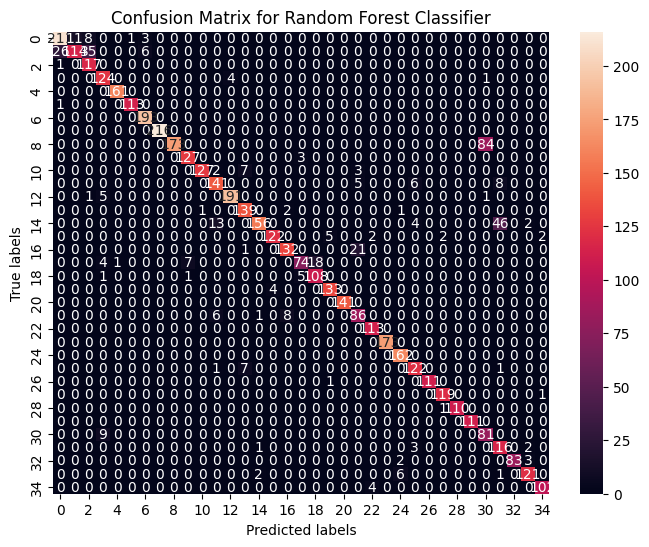

In [6]:
clf1 = RandomForestClassifier(n_estimators=100, random_state=1)
clf1.fit(X_train_segment, y_train_segment)
y_pred1 = clf1.predict(X_test_segment)
accuracy1 = accuracy_score(y_test_segment, y_pred1)
confusion_matrix1 = confusion_matrix(y_test_segment, y_pred1)

print(accuracy1)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix1, annot=True, fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

In [ ]:
clf2 = KNeighborsClassifier(n_neighbors=5)
clf2.fit(X_train_segment, y_train_segment)
y_pred2 = clf2.predict(X_test_segment)
accuracy2 = accuracy_score(y_test_segment, y_pred2)
confusion_matrix2 = confusion_matrix(y_test_segment, y_pred2)

print(accuracy2)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix2, annot=True, fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for K-Nearest Neighbors Classifier')
plt.show()

In [14]:
clf3 = SVC(kernel='linear', C=1.5, probability=True)
clf3.fit(X_train_segment, y_train_segment)
y_pred3 = clf3.predict(X_test_segment)
accuracy3 = accuracy_score(y_test_segment, y_pred3)
confusion_matrix3 = confusion_matrix(y_test_segment, y_pred3)

print(accuracy3)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix3, annot=True, fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Support Vector Classifier')
plt.show()


In [12]:
clf4 = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)
clf4.fit(X_train_segment, y_train_segment)
y_pred4 = clf4.predict(X_test_segment)
accuracy4 = accuracy_score(y_test_segment, y_pred4)
confusion_matrix4 = confusion_matrix(y_test_segment, y_pred4)

print(accuracy4)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix4, annot=True, fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Multi-Layer Perceptron Classifier')
plt.show()

In [73]:
clf1 = RandomForestClassifier(n_estimators=100, random_state=1)
clf2 = KNeighborsClassifier(n_neighbors=5)
clf3 = SVC(kernel='linear', C=1.5, probability=True)
clf4 = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)

eclf = VotingClassifier(estimators=[
    ("rf", clf1), 
    ("knn", clf2), 
    ("svc", clf3), 
    ("mlp", clf4)
], voting="soft")

eclf.fit(X_train_segment, y_train_segment)

VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=1)),
                             ('knn', KNeighborsClassifier()),
                             ('svc',
                              SVC(C=1.5, kernel='linear', probability=True)),
                             ('mlp',
                              MLPClassifier(hidden_layer_sizes=(100, 50),
                                            max_iter=1000))],
                 voting='soft')

In [15]:
y_pred_segment = eclf.predict(X_test_segment)

accuracy_segment = accuracy_score(y_test_segment, y_pred_segment)
print("Accuracy segment:", accuracy_segment)

In [17]:
# Plot the confusion matrix
cm_segment = confusion_matrix(y_test_segment, y_pred_segment)
plt.figure(figsize=(16, 9))
sns.heatmap(cm_segment, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Label")
plt.title("Confusion Matrix for Ensemble Classifier")
plt.show()

In [7]:
def prepare_data(X_train, X_test):
    """Scale features to [0,1] range for chi-squared"""
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled



In [10]:
X_train_scaled_segments, X_test_scaled_segments = prepare_data(X_train_segment, X_test_segment)

k = 10
# 1. Chi-squared
selector_chi2 = SelectKBest(score_func=chi2, k=k)
X_train_chi2 = selector_chi2.fit_transform(X_train_scaled_segments, y_train_segment)
X_test_chi2 = selector_chi2.transform(X_test_scaled_segments)
selected_chi2 = selector_chi2.get_support(indices=True)

# 2. RFE
rfe = RFE(LogisticRegression(max_iter=1000), n_features_to_select=k)
X_train_rfe = rfe.fit_transform(X_train_scaled_segments, y_train_segment)
X_test_rfe = rfe.transform(X_test_scaled_segments)
selected_rfe = rfe.get_support(indices=True)

# 3. Random Forest Importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled_segments, y_train_segment)
importances = pd.Series(rf.feature_importances_, index=feature_names)
selected_rf = importances.nlargest(k).index
selected_rf_indices = [feature_names.index(f) for f in selected_rf]

In [11]:
X_train_scaled_segments_feature_selected_chi2 = []
X_test_scaled_segments_feature_selected_chi2 = []

for x in X_train_scaled_segments:
    X_feature_selected = []
    for i in selected_chi2:
        X_feature_selected.append(x[i])
    X_train_scaled_segments_feature_selected_chi2.append(X_feature_selected)
    
for x in X_test_scaled_segments:
    X_feature_selected = []
    for i in selected_chi2:
        X_feature_selected.append(x[i])
    X_test_scaled_segments_feature_selected_chi2.append(X_feature_selected)
    
    
X_train_scaled_segments_feature_selected_rfe = []
X_test_scaled_segments_feature_selected_rfe = []

for x in X_train_scaled_segments:
    X_feature_selected = []
    for i in selected_rfe:
        X_feature_selected.append(x[i])
    X_train_scaled_segments_feature_selected_rfe.append(X_feature_selected)
    
for x in X_test_scaled_segments:
    X_feature_selected = []
    for i in selected_rfe:
        X_feature_selected.append(x[i])
    X_test_scaled_segments_feature_selected_rfe.append(X_feature_selected)
    

X_train_scaled_segments_feature_selected_rf = []
X_test_scaled_segments_feature_selected_rf = []

for x in X_train_scaled_segments:
    X_feature_selected = []
    for i in selected_rf_indices:
        X_feature_selected.append(x[i])
    X_train_scaled_segments_feature_selected_rf.append(X_feature_selected)
    
for x in X_test_scaled_segments:
    X_feature_selected = []
    for i in selected_rf_indices:
        X_feature_selected.append(x[i])
    X_test_scaled_segments_feature_selected_rf.append(X_feature_selected)
    


In [98]:

clf1 = RandomForestClassifier(n_estimators=100, random_state=1)
clf2 = KNeighborsClassifier(n_neighbors=5)
clf3 = SVC(kernel='linear', C=1.5, probability=True)
clf4 = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)

eclf = VotingClassifier(estimators=[
    ("rf", clf1), 
    ("knn", clf2), 
    ("svc", clf3), 
    ("mlp", clf4)
], voting="soft")

eclf.fit(X_train_scaled_segments_feature_selected_chi2, y_train_segment)
y_pred_segment = eclf.predict(X_test_scaled_segments_feature_selected_chi2)
accuracy_segment = accuracy_score(y_test_segment, y_pred_segment)
print("Accuracy segment:", accuracy_segment)


Accuracy segment: 0.9314580031695721


In [99]:
clf1 = RandomForestClassifier(n_estimators=100, random_state=1)
clf2 = KNeighborsClassifier(n_neighbors=5)
clf3 = SVC(kernel='linear', C=1.5, probability=True)
clf4 = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)

eclf = VotingClassifier(estimators=[
    ("rf", clf1), 
    ("knn", clf2), 
    ("svc", clf3), 
    ("mlp", clf4)
], voting="soft")

eclf.fit(X_train_scaled_segments_feature_selected_rfe, y_train_segment)
y_pred_segment = eclf.predict(X_test_scaled_segments_feature_selected_rfe)
accuracy_segment = accuracy_score(y_test_segment, y_pred_segment)
print("Accuracy segment:", accuracy_segment)

Accuracy segment: 0.9374009508716323


In [100]:
clf1 = RandomForestClassifier(n_estimators=100, random_state=1)
clf2 = KNeighborsClassifier(n_neighbors=5)
clf3 = SVC(kernel='linear', C=1.5, probability=True)
clf4 = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)

eclf = VotingClassifier(estimators=[
    ("rf", clf1), 
    ("knn", clf2), 
    ("svc", clf3), 
    ("mlp", clf4)
], voting="soft")

eclf.fit(X_train_scaled_segments_feature_selected_rf, y_train_segment)
y_pred_segment = eclf.predict(X_test_scaled_segments_feature_selected_rf)
accuracy_segment = accuracy_score(y_test_segment, y_pred_segment)
print("Accuracy segment:", accuracy_segment)

Accuracy segment: 0.9294770206022187


In [12]:
# hyperparameters for RandomForest

param_grid_RF = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(
    random_state=42
)

grid_search_RF = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_RF,
    cv=KFold(n_splits=5),
    n_jobs=-1,
    verbose=2
)

grid_search_RF.fit(X_train_scaled_segments_feature_selected_rf, y_train_segment)

print(grid_search_RF.best_params_)
print(grid_search_RF.best_score_)
print(grid_search_RF.best_estimator_)
y_pred_segment = grid_search_RF.predict(X_test_scaled_segments_feature_selected_rf)
accuracy_segment = accuracy_score(y_test_segment, y_pred_segment)
print("Accuracy segment:", accuracy_segment)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
0.06511045451456675
RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=200,
                       random_state=42)
Accuracy segment: 0.8975832012678289


In [13]:
# hyperparameters for KNN

param_grid_KNN = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()

grid_search_KNN = GridSearchCV(
    estimator=knn,
    param_grid=param_grid_KNN,
    cv=KFold(n_splits=5),
    n_jobs=-1,
    verbose=2
)

grid_search_KNN.fit(X_train_scaled_segments_feature_selected_rf, y_train_segment)

print(grid_search_KNN.best_params_)
print(grid_search_KNN.best_score_)
print(grid_search_KNN.best_estimator_)
y_pred_segment = grid_search_KNN.predict(X_test_scaled_segments_feature_selected_rf)
accuracy_segment = accuracy_score(y_test_segment, y_pred_segment)
print("Accuracy segment:", accuracy_segment)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
0.07087175708947999
KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')
Accuracy segment: 0.9128367670364501


In [14]:
# hyperparameters for SVC

param_grid_SVC = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

svc = SVC()

grid_search_SVC = GridSearchCV(
    estimator=svc,
    param_grid=param_grid_SVC,
    cv=KFold(n_splits=5),
    n_jobs=-1,
    verbose=2
)

grid_search_SVC.fit(X_train_scaled_segments_feature_selected_rf, y_train_segment)

print(grid_search_SVC.best_params_)
print(grid_search_SVC.best_score_)
print(grid_search_SVC.best_estimator_)
y_pred_segment = grid_search_SVC.predict(X_test_scaled_segments_feature_selected_rf)
accuracy_segment = accuracy_score(y_test_segment, y_pred_segment)
print("Accuracy segment:", accuracy_segment)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
{'C': 100, 'kernel': 'poly'}
0.07471233594808177
SVC(C=100, kernel='poly')
Accuracy segment: 0.937797147385103


In [15]:
# hyperparameters for MLP

param_grid_MLP = {
    'hidden_layer_sizes': [(100,), (100, 50), (100, 50, 25)],
    'activation': [ 'logistic', 'relu'],
    'solver': ['adam', 'sgd'],
    'max_iter': [1000, 2000]
}

mlp = MLPClassifier()

grid_search_MLP = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid_MLP,
    cv=KFold(n_splits=3),
    n_jobs=-1,
    verbose=2
)

grid_search_MLP.fit(X_train_scaled_segments_feature_selected_rf, y_train_segment)

print(grid_search_MLP.best_params_)
print(grid_search_MLP.best_score_)
print(grid_search_MLP.best_estimator_)
y_pred_segment = grid_search_MLP.predict(X_test_scaled_segments_feature_selected_rf)
accuracy_segment = accuracy_score(y_test_segment, y_pred_segment)
print("Accuracy segment:", accuracy_segment)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
{'activation': 'logistic', 'hidden_layer_sizes': (100, 50), 'max_iter': 2000, 'solver': 'adam'}
0.03983109648963882
MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 50),
              max_iter=2000)
Accuracy segment: 0.9257131537242472


In [16]:

def plot_confusion_matrix(y_true, y_pred, classifier_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(16, 9))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
    plt.title(f'Confusion Matrix for {classifier_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [18]:
#classifiers with best hyperparameters
# RandomForest
n_estimators = grid_search_RF.best_params_['n_estimators']
max_depth = grid_search_RF.best_params_['max_depth']
min_samples_split = grid_search_RF.best_params_['min_samples_split']
min_samples_leaf = grid_search_RF.best_params_['min_samples_leaf']
clf_RF = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, random_state=42)
# KNN
n_neighbors = grid_search_KNN.best_params_['n_neighbors']
weights = grid_search_KNN.best_params_['weights']
metric = grid_search_KNN.best_params_['metric']
clf_KNN = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, metric=metric)
# SVC
C = grid_search_SVC.best_params_['C']
kernel = grid_search_SVC.best_params_['kernel']
clf_SVC = SVC(C=C, kernel=kernel, probability=True)
# MLP
hidden_layer_sizes = grid_search_MLP.best_params_['hidden_layer_sizes']
activation = grid_search_MLP.best_params_['activation']
solver = grid_search_MLP.best_params_['solver']
max_iter = grid_search_MLP.best_params_['max_iter']
clf_MLP = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation=activation, solver=solver, max_iter=max_iter)

classifiers = {
    'Random Forest': clf_RF,
    'K-Nearest Neighbors': clf_KNN,
    'Support Vector Classifier': clf_SVC,
    'Multi-Layer Perceptron': clf_MLP
}

# Ensemble Classifier
eclf = VotingClassifier(estimators=[
    ("rf", clf_RF), 
    ("knn", clf_KNN), 
    ("svc", clf_SVC), 
    ("mlp", clf_MLP)
], voting="soft")

eclf.fit(X_train_scaled_segments_feature_selected_rf, y_train_segment)
y_pred_segment = eclf.predict(X_test_scaled_segments_feature_selected_rf)
accuracy_segment = accuracy_score(y_test_segment, y_pred_segment)
print("Accuracy segment:", accuracy_segment)

Accuracy segment: 0.9330427892234548


In [20]:

#classifiers with best hyperparameters
# RandomForest
n_estimators = grid_search_RF.best_params_['n_estimators']
max_depth = grid_search_RF.best_params_['max_depth']
min_samples_split = grid_search_RF.best_params_['min_samples_split']
min_samples_leaf = grid_search_RF.best_params_['min_samples_leaf']
clf_RF = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, random_state=42)
# KNN
n_neighbors = grid_search_KNN.best_params_['n_neighbors']
weights = grid_search_KNN.best_params_['weights']
metric = grid_search_KNN.best_params_['metric']
clf_KNN = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, metric=metric)
# SVC
C = grid_search_SVC.best_params_['C']
kernel = grid_search_SVC.best_params_['kernel']
clf_SVC = SVC(C=C, kernel=kernel, probability=True)
# MLP
hidden_layer_sizes = (100, 100) # grid_search_MLP.best_params_['hidden_layer_sizes']
activation = "relu" # grid_search_MLP.best_params_['activation']
solver = "adam" #grid_search_MLP.best_params_['solver']
max_iter = 1000 #grid_search_MLP.best_params_['max_iter']
clf_MLP = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation=activation, solver=solver, max_iter=max_iter)

classifiers = {
    'Random Forest': clf_RF,
    'K-Nearest Neighbors': clf_KNN,
    'Support Vector Classifier': clf_SVC,
    'Multi-Layer Perceptron': clf_MLP
}

# Ensemble Classifier
eclf_voting = VotingClassifier(estimators=[
    ("rf", clf_RF), 
    ("knn", clf_KNN), 
    ("svc", clf_SVC), 
    ("mlp", clf_MLP)
], voting="soft")

eclf_voting.fit(X_train_scaled_segments_feature_selected_rf, y_train_segment)
y_pred_segment = eclf_voting.predict(X_test_scaled_segments_feature_selected_rf)
accuracy_segment = accuracy_score(y_test_segment, y_pred_segment)
print("Accuracy segment:", accuracy_segment)

eclf_voting2 = VotingClassifier(estimators=[
    ("rf", clf_RF), 
    ("knn", clf_KNN), 
    ("svc", clf_SVC), 
    ("mlp", clf_MLP)
], voting="soft")

eclf_voting2.fit(X_train_scaled_segments_feature_selected_rfe, y_train_segment)
y_pred_segment = eclf_voting2.predict(X_test_scaled_segments_feature_selected_rfe)
accuracy_segment_voting = accuracy_score(y_test_segment, y_pred_segment)
print("Accuracy segment:", accuracy_segment_voting)

eclf_voting3 = VotingClassifier(estimators=[   
    ("rf", clf_RF), 
    ("knn", clf_KNN), 
    ("svc", clf_SVC), 
    ("mlp", clf_MLP)
], voting="soft")

eclf_voting3.fit(X_train_scaled_segments_feature_selected_chi2, y_train_segment)
y_pred_segment = eclf_voting3.predict(X_test_scaled_segments_feature_selected_chi2)
accuracy_segment = accuracy_score(y_test_segment, y_pred_segment)
print("Accuracy segment:", accuracy_segment)




Accuracy segment: 0.9393819334389857
Accuracy segment: 0.9498811410459588
Accuracy segment: 0.9467115689381933


In [21]:
eclf_stacking = StackingClassifier(estimators=[
    ("rf", clf_RF), 
    ("knn", clf_KNN), 
    ("svc", clf_SVC), 
    ("mlp", clf_MLP)
], final_estimator=clf_RF)

eclf_stacking.fit(X_train_scaled_segments_feature_selected_rf, y_train_segment)
y_pred_segment1 = eclf_stacking.predict(X_test_scaled_segments_feature_selected_rf)
accuracy_segment = accuracy_score(y_test_segment, y_pred_segment1)
print("Accuracy segment:", accuracy_segment)

eclf_stacking2 = StackingClassifier(estimators=[
    ("rf", clf_RF), 
    ("knn", clf_KNN), 
    ("svc", clf_SVC), 
    ("mlp", clf_MLP)
], final_estimator=clf_RF)

eclf_stacking2.fit(X_train_scaled_segments_feature_selected_rfe, y_train_segment)
y_pred_segment2 = eclf_stacking2.predict(X_test_scaled_segments_feature_selected_rfe)
accuracy_segment_stacking = accuracy_score(y_test_segment, y_pred_segment2)
print("Accuracy segment:", accuracy_segment_stacking)

eclf_stacking3 = StackingClassifier(estimators=[
    ("rf", clf_RF), 
    ("knn", clf_KNN), 
    ("svc", clf_SVC), 
    ("mlp", clf_MLP)
], final_estimator=clf_RF)

eclf_stacking3.fit(X_train_scaled_segments_feature_selected_chi2, y_train_segment)
y_pred_segment3 = eclf_stacking3.predict(X_test_scaled_segments_feature_selected_chi2)
accuracy_segment = accuracy_score(y_test_segment, y_pred_segment3)
print("Accuracy segment:", accuracy_segment)



Accuracy segment: 0.9393819334389857
Accuracy segment: 0.9532488114104596
Accuracy segment: 0.9437400950871633


In [23]:
clf_AB = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=10), n_estimators=100, random_state=42)
clf_AB.fit(X_train_scaled_segments_feature_selected_rf, y_train_segment)
y_pred_segment = clf_AB.predict(X_test_scaled_segments_feature_selected_rf)
accuracy_segment = accuracy_score(y_test_segment, y_pred_segment)
print("Accuracy segment:", accuracy_segment)


clf_Ab2 = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=10),n_estimators=100, random_state=42)
clf_Ab2.fit(X_train_scaled_segments_feature_selected_rfe, y_train_segment)
y_pred_segment = clf_Ab2.predict(X_test_scaled_segments_feature_selected_rfe)
accuracy_segment_AB = accuracy_score(y_test_segment, y_pred_segment)
print("Accuracy segment:", accuracy_segment_AB)


clf_AB3 = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=10), n_estimators=100, random_state=42)
clf_AB3.fit(X_train_scaled_segments_feature_selected_chi2, y_train_segment)
y_pred_segment = clf_AB3.predict(X_test_scaled_segments_feature_selected_chi2)
accuracy_segment = accuracy_score(y_test_segment, y_pred_segment)
print("Accuracy segment:", accuracy_segment)


Accuracy segment: 0.9160063391442155
Accuracy segment: 0.9233359746434231
Accuracy segment: 0.9156101426307448


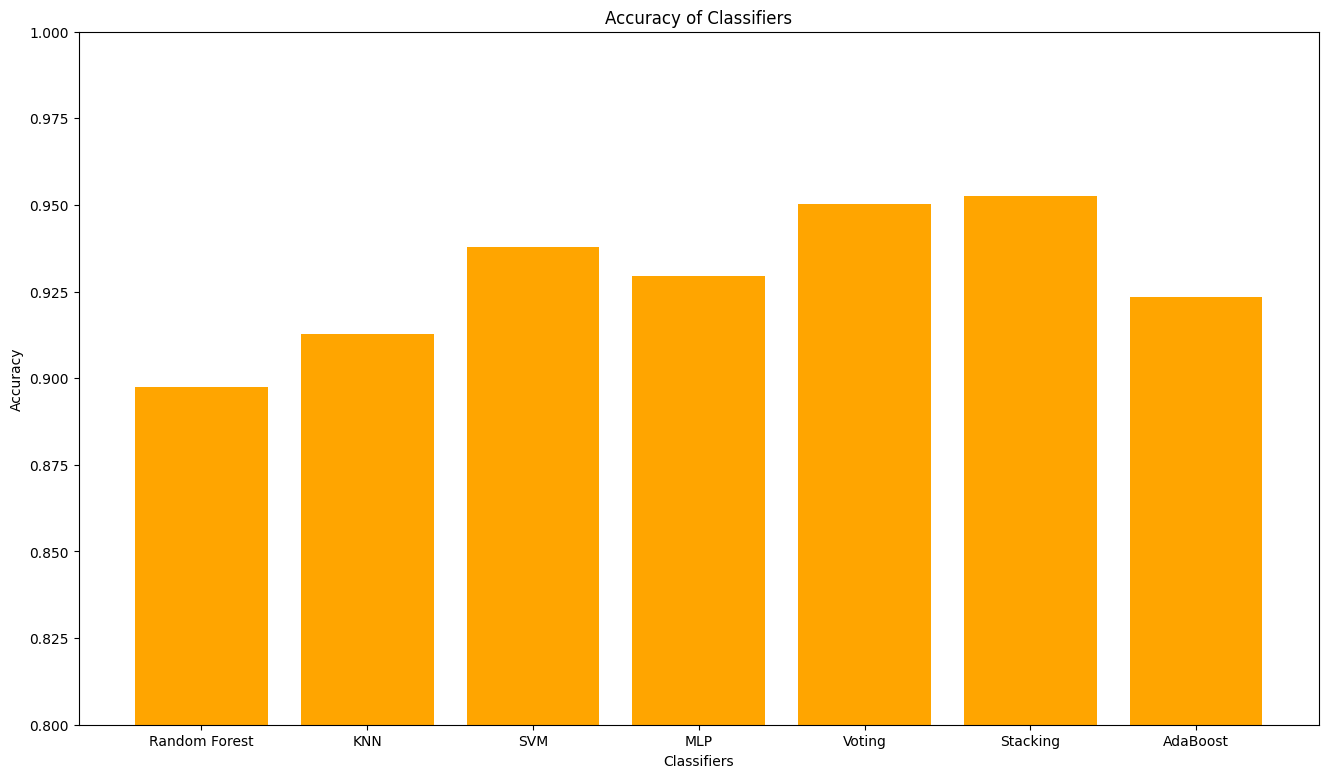

In [ ]:

# random forest
n_estimators = grid_search_RF.best_params_['n_estimators']
max_depth = grid_search_RF.best_params_['max_depth']
min_samples_split = grid_search_RF.best_params_['min_samples_split']
min_samples_leaf = grid_search_RF.best_params_['min_samples_leaf']
clf_RF = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, random_state=42)
# KNN
n_neighbors = grid_search_KNN.best_params_['n_neighbors']
weights = grid_search_KNN.best_params_['weights']
metric = grid_search_KNN.best_params_['metric']
clf_KNN = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, metric=metric)
# SVC
C = grid_search_SVC.best_params_['C']
kernel = grid_search_SVC.best_params_['kernel']
clf_SVC = SVC(C=C, kernel=kernel, probability=True)
# MLP
hidden_layer_sizes = grid_search_MLP.best_params_['hidden_layer_sizes']
activation = grid_search_MLP.best_params_['activation']
solver = grid_search_MLP.best_params_['solver']
max_iter = grid_search_MLP.best_params_['max_iter']
clf_MLP = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation=activation, solver=solver, max_iter=max_iter)

clf_RF.fit(X_train_scaled_segments_feature_selected_rf, y_train_segment)
y_pred_segment_RF = clf_RF.predict(X_test_scaled_segments_feature_selected_rf)
accuracy_segment_RF = accuracy_score(y_test_segment, y_pred_segment_RF)

clf_KNN.fit(X_train_scaled_segments_feature_selected_rf, y_train_segment)
y_pred_segment_KNN = clf_KNN.predict(X_test_scaled_segments_feature_selected_rf)
accuracy_segment_KNN = accuracy_score(y_test_segment, y_pred_segment_KNN)

clf_SVC.fit(X_train_scaled_segments_feature_selected_rf, y_train_segment)
y_pred_segment_SVC = clf_SVC.predict(X_test_scaled_segments_feature_selected_rf)
accuracy_segment_SVC = accuracy_score(y_test_segment, y_pred_segment_SVC)

clf_MLP.fit(X_train_scaled_segments_feature_selected_rf, y_train_segment)
y_pred_segment_MLP = clf_MLP.predict(X_test_scaled_segments_feature_selected_rf)
accuracy_segment_MLP = accuracy_score(y_test_segment, y_pred_segment_MLP)


accuracy_segments = [accuracy_segment_RF, accuracy_segment_KNN, accuracy_segment_AB, accuracy_segment_MLP, accuracy_segment_SVC, accuracy_segment_voting, accuracy_segment_stacking]
classifiers = ['Random Forest', 'KNN', 'AdaBoost', 'MLP', 'SVM', 'Voting', 'Stacking', ]



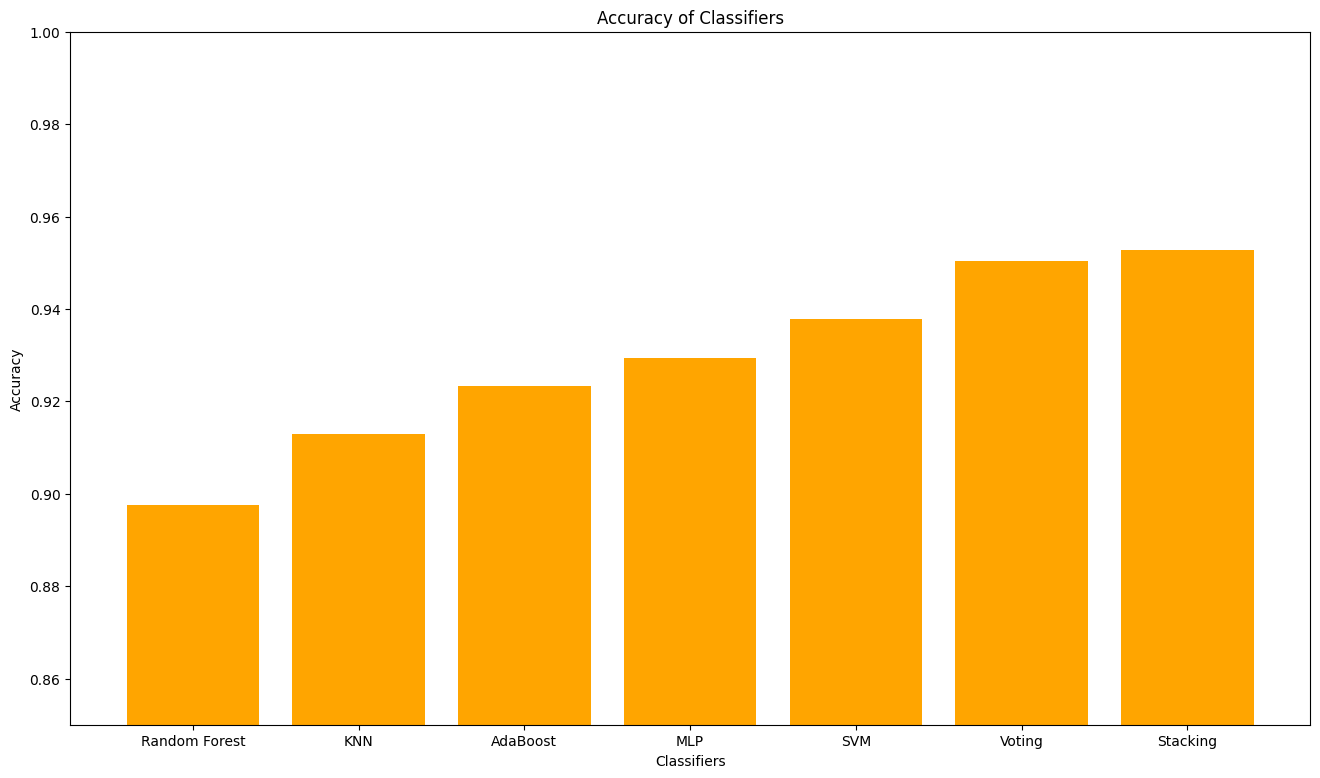

In [154]:
accuracy_segments = [accuracy_segment_RF, accuracy_segment_KNN, accuracy_segment_AB, accuracy_segment_MLP, accuracy_segment_SVC, accuracy_segment_voting, accuracy_segment_stacking]
classifiers = ['Random Forest', 'KNN', 'AdaBoost', 'MLP', 'SVM', 'Voting', 'Stacking', ]

plt.figure(figsize=(16, 9))
plt.bar(classifiers, accuracy_segments, color='Orange')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy of Classifiers')
# limit y axis to 0.8 to 1
plt.ylim(0.85, 1)



plt.show()

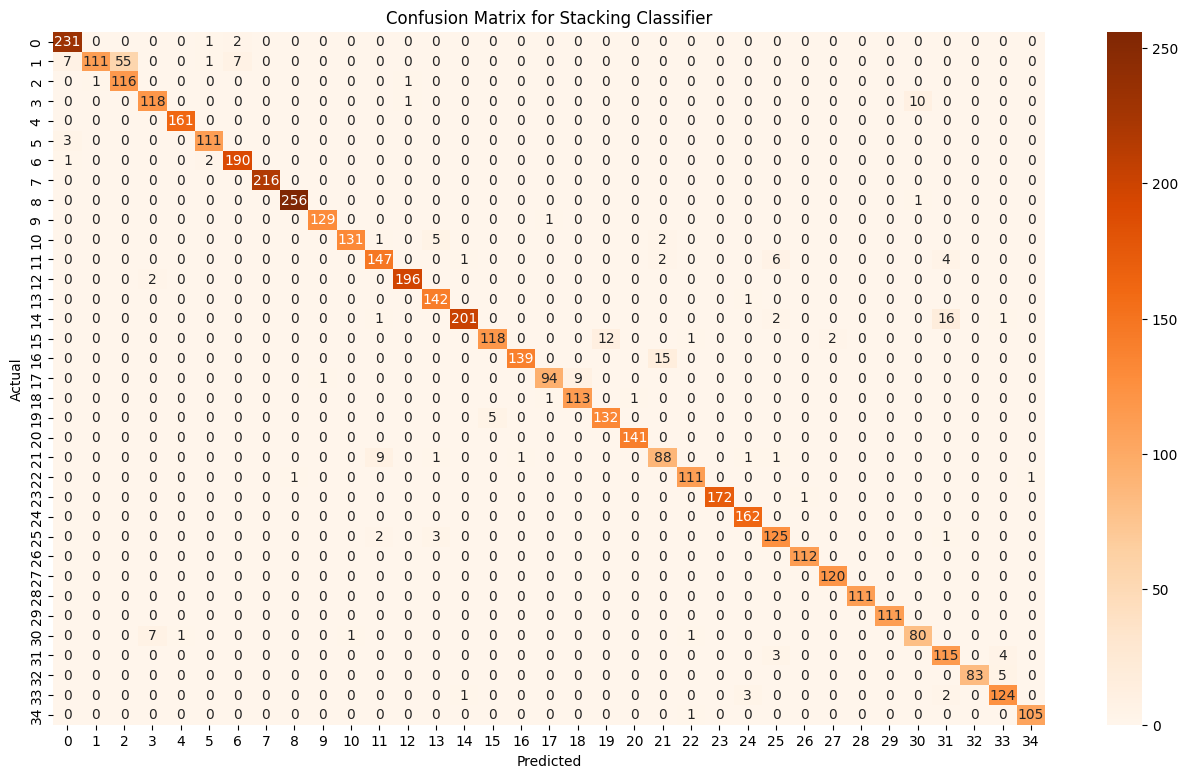

In [24]:
# confusion matrix of stacking classifier
plot_confusion_matrix(y_test_segment, y_pred_segment2, 'Stacking Classifier')

